<a href="https://colab.research.google.com/github/Sreeja-coder/DeepLearning/blob/main/Exploring_Boston_houses_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.svm import SVR
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

## **Question 1**

In [ ]:
X,y = make_classification(n_samples=500,n_classes=2,n_features=20,n_informative=10)
# here we are creating 500 samples (n_samples) with two output labels (n_classes) , each row/datapoint will have 20 features in total out of which 10 are important informative the rest would be redundant + duplicates(picked randomly from redundant and informative)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
mlp = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)

In [ ]:
# define a parametere space for the tuning and then use that with GridSearchCV to search in it for a good estimator
parameter_space = {
'hidden_layer_sizes': [(10,50),(150,250)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.05],
'learning_rate': ['constant','adaptive'],
}

In [ ]:
classifier = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
# here we are using the sklearn's GridSearch with mlp classifier and parameter space defined above. Also n_jobs = -1 means use all the cores available and cv=5 is for number of splits for cross validation

In [ ]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
classifier.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (150, 250),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
y_test_predictions = classifier.predict(X_test)

In [ ]:
f1_score(y_test,y_test_predictions)*100

92.78350515463917

## **Question 2**

In [ ]:
# quesyion 2.1
boston_data = pd.read_csv('/content/boston_house.csv')


In [ ]:
# question 2.1
boston_data.shape

(506, 14)

In [ ]:
boston_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# question 2.2
# I dont see any categorical data
boston_data.select_dtypes(include=['category'])

""
0
1
2
3
4
...
501
502
503
504


In [ ]:
# question 2.3
# we are checking for null values in the boston dataset . isnull() returns a series of "True" if there is a null value and "False" if there is no null value 
# then we apply sum() to the series returned from the isnull() . This will help us get the total number of null values in each column if any.
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

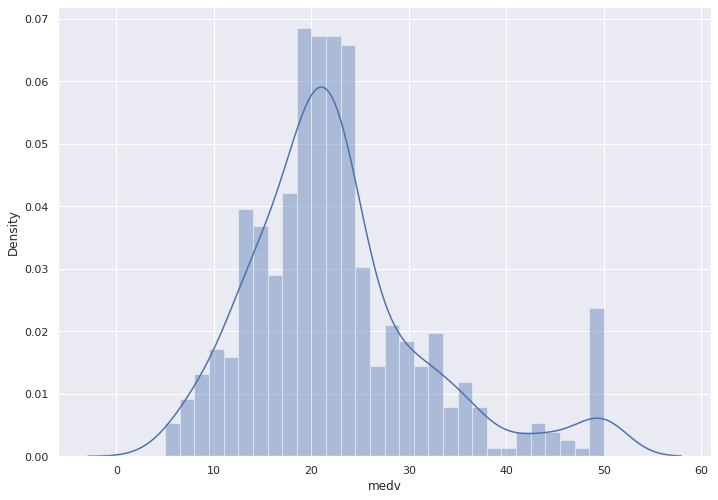

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['medv'], bins=30)
plt.show()

the objective is to predict the prices of the houses based on the features <br>.
The prices are stored in the MEDV column<br>
so lets see the distribution of the target variable<br>
the distplot helps us to see the distribution of the target variable , it is a normal distribution with few outliers like bin 50 

In [ ]:
features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

In [ ]:
X= boston_data[features]
y = np.array(boston_data['medv'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

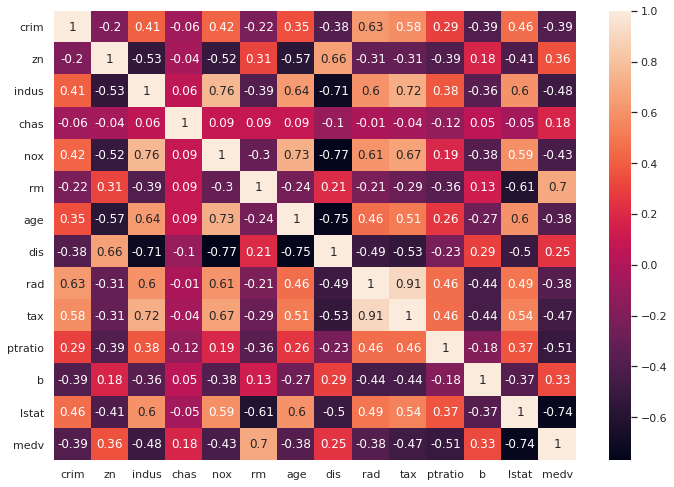

In [ ]:
# now we will build correlation matrix, it will show how all the variables correlates with the target "medv"
correlation_matrix = boston_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


here we can see that variables "rm" has a postivie correlation with "medv"<br>
also variable "lstat" has negative correlation with "medv"

--------------------------------------------------------------------------------------------

so we define regressors <br>

In [ ]:
svm_model = SVR()
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
knn_model = KNeighborsRegressor()
randf_model =  RandomForestRegressor()
decisionT_model = DecisionTreeRegressor()  

we have to fine tune atleast two parameters for each regressors so we define that as follows


import sklearn <br>
sorted(sklearn.metrics.SCORERS.keys()) <br>
helps us to find the scoring we have to use <br>
the scoring will be used to select the best model

In [ ]:
rf_param = {
    'n_estimators': randint(4,200),
    'max_depth' : [10,20,None]
}
knn_param={
    'n_neighbors': [5,10,2],
    'metric' :['euclidean','manhattan','chebyshev','minkowski']
}
dt_param ={
    'max_depth':[10,4,20,50],
    'min_samples_split':[3,5,2]
}
xgb_param = {
    'max_depth':[10,2,20],
    'tree_method':['exact','approx','hist','gpu_hist']
}
svm_param = {
    'kernel':['poly','sigmoid','rbf'],
    'C':[1.5,1.25,0.5]
}

In [ ]:
clf_rf = RandomizedSearchCV(randf_model, rf_param,scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=2019)
clf_dt = RandomizedSearchCV(decisionT_model, dt_param,scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=2019)
clf_svm = RandomizedSearchCV(svm_model, svm_param,scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=2019)
clf_xgb = RandomizedSearchCV(xgb_model, xgb_param,scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=2019)
clf_knn = RandomizedSearchCV(knn_model, knn_param,scoring='neg_mean_squared_error', n_iter=50, cv=5, random_state=2019)

In [ ]:
model_rf = clf_rf.fit(X_train,y_train)
model_dt = clf_dt.fit(X_train,y_train)
model_svm = clf_svm.fit(X_train,y_train)
model_knn = clf_knn.fit(X_train,y_train)
model_xgb = clf_xgb.fit(X_train,y_train)

In [ ]:
print("Random forest",model_rf.best_score_)
print("Decision Tree",model_dt.best_score_)
print("SVM",model_svm.best_score_)
print("KNN",model_knn.best_score_)
print("XGB",model_xgb.best_score_)


Random forest -14.266252444208854
Decision Tree -28.946480824700917
SVM -70.8259484806271
KNN -35.849082259259255
XGB -11.670600762924181


so as per the MSE score I will choose "XGB" as the regressor with the lowest error value

In [ ]:
model_xgb.score(X_test,y_test)

-7.59562443716176

In [ ]:
# model_xgb.score(X_test,y_test)
y_pred = model_xgb.predict(X_test)
mean_squared_error(y_test, y_pred)

7.59562443716176

## **Question 3**

In [3]:
X,y = make_classification(n_samples=10000,n_classes=2,n_features=200)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

first we define the input layer since each row will be an input we need to have a shape of 200 as we have 200 features<br>
then we have two hidden layers with number of units/nodes = 16 and activation function as relu <br>
then an output layer <br>

Also we need to make sure that we add the parametes we are trying to tune already in the build_model function <br>


In [5]:
def build_model(n_hidden=2, n_neurons=16, learning_rate=3e-3, input_shape=[200],epochs=5,batch_size=5,optimizer='Adam'):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1,activation="relu"))
    optimizer = optimizers.RMSprop(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [6]:
keras_classifier = KerasClassifier(build_model)

In [7]:
hyper_param = {
    'epochs': [5,10],
    'batch_size': [5,10,100],
    'optimizer':['RMSprop', 'Adam'],
}

In [8]:
rnd_search_cv = RandomizedSearchCV(keras_classifier, hyper_param, n_iter=70, cv=3)

In [9]:
rnd_search_cv.fit(X_train,y_train)

Epoch 1/5
1067/1067 [==============================] - 2s 1ms/step - loss: 2.9941 - accuracy: 0.6817
Epoch 2/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.5707 - accuracy: 0.8638
Epoch 3/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.4527 - accuracy: 0.8794
Epoch 4/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.4515 - accuracy: 0.8867
Epoch 5/5
534/534 [==============================] - 1s 965us/step - loss: 1.9133 - accuracy: 0.8511
Epoch 1/5
1067/1067 [==============================] - 2s 1ms/step - loss: 3.4149 - accuracy: 0.6811
Epoch 2/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.4367 - accuracy: 0.8693
Epoch 3/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.2221 - accuracy: 0.8932
Epoch 4/5
1067/1067 [==============================] - 1s 1ms/step - loss: 1.3779 - accuracy: 0.8931
Epoch 5/5
534/534 [==============================] - 1s 972us/step - loss: 1.8949 - accurac

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f772a439e50>,
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'batch_size': [5, 10, 100],
                                        'epochs': [5, 10],
                                        'optimizer': ['RMSprop', 'Adam']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [10]:
rnd_search_cv.best_params_

{'batch_size': 5, 'epochs': 5, 'optimizer': 'Adam'}